In [1]:
import sys
sys.path.append('Restricted-Boltzmann-Machine/')
import RBM
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from time import time
from math import ceil

In [2]:
import cv2

In [3]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x.reshape(60000,-1)/255

In [4]:
train_x.shape, train_y.shape

((60000, 784), (60000,))

In [5]:

train_x.dtype, train_x.min(), train_x.max()

(dtype('float64'), 0.0, 1.0)

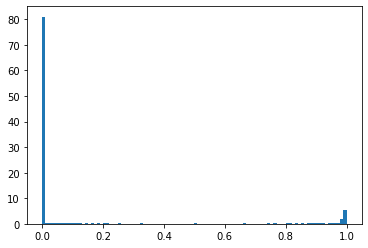

In [6]:
ret= plt.hist(train_x.reshape(-1),density=True, bins=100);

In [7]:
_, cnts = np.unique(train_x.reshape(-1),return_counts=True)

In [8]:
("{:,} "*2).format(cnts[0], cnts[100:].sum())

'38,045,844 6,697,502 '

## Create and train an RBM
- number of visible nodes: 728 (size of image)
- number of hidden nodes: 64

In [9]:


def get_batches(data, batch_size, shuffle=False):
    '''
    Function to provide data in batches.
    input:
        - data: The data to be batched, each sample in one row.
        - batch_size: Size of one batch (last batch might be smaller)
        - shuffle: True if data should be shuffled.
    '''
    if(shuffle):
        np.random.shuffle(data)
    if(batch_size == -1):
        batch_size = len(data)
    num_batches = ceil(data.shape[0]/batch_size)
    for batch_num in range(num_batches):
        yield data[batch_num*batch_size:(batch_num+1)*batch_size]



In [9]:
np.random.seed(53280)

rbm = RBM.RBM(n_vis=784, n_hid = 64)

# Some parameters to set
batch_size = 100
num_epochs = 20
lr = 0.1
burn_in = 0
num_steps = 1


# Training loop
errors = []
free_energies_val = []
free_energies_train = []
start_time = time()

# plot_images(rbm, selected_imgs, 
#             title="Reconstructed Images    Epoch: 0",
#             save_as="recon_" + str(0))

for epoch in range(1, num_epochs+1):
    iteration = 0
    error = 0
    for batch in get_batches(train_x, batch_size, shuffle=True):
        iteration += 1
   
        # Compute gradients and errors
        error += rbm.compute_error_and_grads(batch, burn_in=burn_in, num_steps=num_steps)
        
        # Update parameters - use momentum as explained in Hinton's guide
        
        if(epoch > 5):
            rbm.update_params(lr, momentum=0.5)
        else:
            rbm.update_params(lr, momentum=0.9)
        
    #plot_images(rbm, selected_imgs, 
    #        title="Reconstructed Images    Epoch: {}".format(epoch),
    #        save_as="recon_" + str(epoch))
        
    print("epoch:{} \t error:{:.4f} \t training time:{:.2f} s".format(epoch, error, time()-start_time))
    errors.append(error)



epoch:1 	 error:21535.6471 	 training time:7.16 s
epoch:2 	 error:12401.6803 	 training time:14.13 s
epoch:3 	 error:11356.5159 	 training time:20.98 s
epoch:4 	 error:10873.1803 	 training time:27.92 s
epoch:5 	 error:10540.4569 	 training time:34.72 s
epoch:6 	 error:10307.0440 	 training time:41.96 s
epoch:7 	 error:10116.8139 	 training time:48.93 s
epoch:8 	 error:9969.0602 	 training time:56.02 s
epoch:9 	 error:9845.3346 	 training time:62.86 s
epoch:10 	 error:9747.1983 	 training time:69.68 s
epoch:11 	 error:9660.6364 	 training time:76.61 s
epoch:12 	 error:9588.3070 	 training time:83.70 s
epoch:13 	 error:9520.2577 	 training time:90.61 s
epoch:14 	 error:9469.1814 	 training time:97.63 s
epoch:15 	 error:9419.8793 	 training time:104.56 s
epoch:16 	 error:9384.7413 	 training time:111.49 s
epoch:17 	 error:9349.4269 	 training time:118.40 s
epoch:18 	 error:9307.6370 	 training time:125.34 s
epoch:19 	 error:9273.1654 	 training time:132.15 s
epoch:20 	 error:9235.5345 	 

In [24]:
np.random.seed(53280)

rbm2 = RBM.RBM(n_vis=784, n_hid = 128)

# Some parameters to set
batch_size = 100
num_epochs = 40
lr = 0.15
momentum = 0.5
burn_in = 0
num_steps = 1


# Training loop
errors = []
free_energies_val = []
free_energies_train = []
start_time = time()

# plot_images(rbm, selected_imgs, 
#             title="Reconstructed Images    Epoch: 0",
#             save_as="recon_" + str(0))

for epoch in range(1, num_epochs+1):
    iteration = 0
    error = 0
    for batch in get_batches(train_x, batch_size, shuffle=True):
        iteration += 1
   
        # Compute gradients and errors
        error += rbm2.compute_error_and_grads(batch, burn_in=burn_in, num_steps=num_steps)
        
        # Update parameters - use momentum as explained in Hinton's guide

        rbm2.update_params(lr, momentum)
    lr *= 0.98
    momentum *= 0.95
    #plot_images(rbm, selected_imgs, 
    #        title="Reconstructed Images    Epoch: {}".format(epoch),
    #        save_as="recon_" + str(epoch))
        
    print("epoch:{} \t error:{:.4f} \t training time:{:.2f} s lr: {:.4f} momentum: {:.3f}".format(
        epoch, error, time()-start_time, lr, momentum))
    errors.append(error)



epoch:1 	 error:15110.0612 	 training time:8.38 s lr: 0.1470 momentum: 0.475
epoch:2 	 error:8389.3412 	 training time:16.84 s lr: 0.1441 momentum: 0.451
epoch:3 	 error:7550.7870 	 training time:25.40 s lr: 0.1412 momentum: 0.429
epoch:4 	 error:7121.8490 	 training time:33.68 s lr: 0.1384 momentum: 0.407
epoch:5 	 error:6859.9019 	 training time:42.00 s lr: 0.1356 momentum: 0.387
epoch:6 	 error:6683.2354 	 training time:50.24 s lr: 0.1329 momentum: 0.368
epoch:7 	 error:6558.8477 	 training time:58.47 s lr: 0.1302 momentum: 0.349
epoch:8 	 error:6466.2344 	 training time:66.72 s lr: 0.1276 momentum: 0.332
epoch:9 	 error:6381.0791 	 training time:74.95 s lr: 0.1251 momentum: 0.315
epoch:10 	 error:6313.8347 	 training time:83.18 s lr: 0.1226 momentum: 0.299
epoch:11 	 error:6257.1941 	 training time:91.44 s lr: 0.1201 momentum: 0.284
epoch:12 	 error:6208.3310 	 training time:99.66 s lr: 0.1177 momentum: 0.270
epoch:13 	 error:6164.2537 	 training time:107.89 s lr: 0.1154 momentum: 

In [11]:
def reconstruct(rbm,image_batch):
    image_batch = image_batch.reshape(image_batch.shape[0],-1)
    hidden, _ = rbm.h_given_v(image_batch)
    visible, _ = rbm.v_given_h(hidden)
    return visible

In [21]:
visible = reconstruct(rbm, test_x)


In [27]:
visible128 = reconstruct(rbm2, test_x)

In [22]:
def compare_original_to_reconst(orig, reconst):
    n_compares = min(orig.shape[0],5)
    fig, axs = plt.subplots(n_compares,3,figsize=(8,3*n_compares))
    for i in range(n_compares):
        axs[i,0].imshow(orig[i],cmap="gray")
        axs[i,1].imshow(reconst[i].reshape(28,28),cmap="gray")
        axs[i,2].imshow(cv2.resize(cv2.resize(orig[i],(8,8)),(28,28)),cmap="gray")
    axs[0,0].set_title("Original", fontsize=18)
    axs[0,1].set_title("re-constructed", fontsize=18)
    axs[0,2].set_title("Scaled", fontsize=18)
    return fig

In [29]:
def compare_original_double_reconst(orig, reconst1, reconst2,):
    n_compares = min(orig.shape[0],5)
    fig, axs = plt.subplots(n_compares,4,figsize=(12,3*n_compares))
    for i in range(n_compares):
        axs[i,0].imshow(orig[i],cmap="gray")
        axs[i,1].imshow(reconst1[i].reshape(28,28),cmap="gray")
        axs[i,2].imshow(reconst2[i].reshape(28,28),cmap="gray")
        axs[i,3].imshow(cv2.resize(cv2.resize(orig[i],(8,8)),(28,28)),cmap="gray")
    axs[0,0].set_title("Original", fontsize=18)
    axs[0,1].set_title("re-constructed (1)", fontsize=18)
    axs[0,2].set_title("re-constructed (2)", fontsize=18)
    axs[0,3].set_title("Scaled", fontsize=18)
    return fig

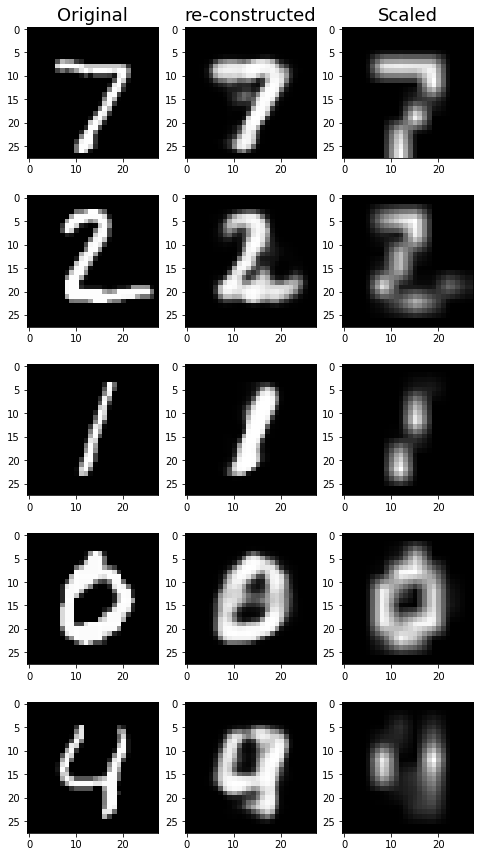

In [23]:
fig = compare_original_to_reconst(test_x, visible)
plt.savefig('comparison1.png',facecolor='white',)

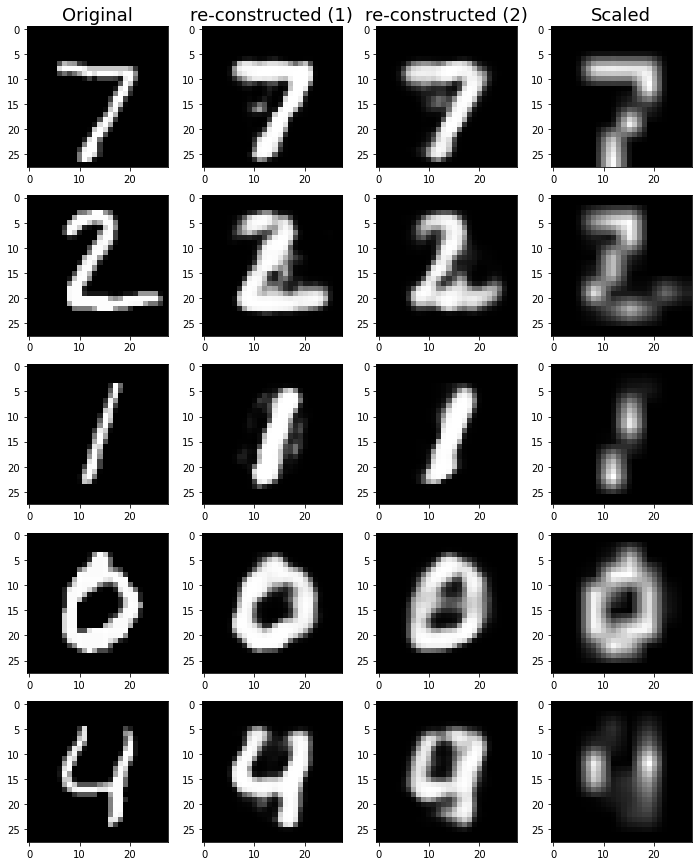

In [30]:
fig = compare_original_double_reconst(test_x, visible128, visible)
plt.savefig('comparison2.png',facecolor='white',)